## Lending Club Credit Risk Modeling
- In this project, I will build three **machine learning** models to predict the three components of expected loss in the context of **credit risk modeling** at the **Lending Club** (a peer-to-peer credit company): **Probability of Default (PD), Exposure at Default (EAD) and Loss Given Default (LGD)**. The expected loss will be the product of these elements: **Expected Loss (EL) = PD * EAD * LGD**. These models will be used to stablish a credit policy, deciding wheter to grant a loan or not for new applicants (application model) based on their credit scores and expected losses on loans. By estimating the Expected Loss (EL) from each loan, the Lending Club can also assess the required capital to hold to protect itself against defaults.
- The PD modelling encompasses a binary classification problem with target being 1 in case of non-default and 0 in case of default. A Logistic Regression model will be built. 
- The LGD and EAD modelling encompasses a beta regression problem, that is, a regression task in which the dependent variables are beta distributed (proportions), the recovery rate and credit conversion factor, respectively.
- The **solution pipeline** is based on the **crisp-dm** framework:
    1. Business understanding.
    2. Data understanding.
    3. Data preparation.
    4. Modelling.
    5. Validation.
    6. Deployment.
- Below, I will introduce **information** about the **company**, the **business problem**, the **project objectives and benefits**, and some important **concepts** to have in mind, given that I am dealing with a credit risk problem.

## Lending Club
- **What is the Lending Club?:**
    - LendingClub is a **peer-to-peer lending platform** that facilitates the borrowing and lending of money directly between individuals, without the need for traditional financial institutions such as banks. The platform operates as an online marketplace, connecting borrowers seeking personal loans with investors willing to fund those loans.

## Business Problem: Managing Default Risks and Optimizing Returns
- **What is the business problem?**
    - LendingClub faces a significant business challenge related to **managing default risks effectively** while **optimizing returns** for its investors. The platform facilitates peer-to-peer lending, connecting borrowers with investors, and relies on **accurate risk assessments to maintain a sustainable and profitable lending ecosystem.** Thus, the CEO wants us to provide insights about which factors are associated with credit risk in Lending Club's operations, and to construct models capable of predicting the probability of default for new applicants and possible losses on its loans in order to establish a credit policy, deciding when to grant a loan or not for an applicant. An important observation is that the CEO wants these models to be easy to understand. Since our company works on the internet, making customers happy and being clear is really important. So, we need to be able to explain why we decide to approve or deny a loan.
- **Which are the project objectives and benefits?**
    1. Identify the factors associated with **credit risk** in the form of business **insights.**
    2. Develop an accurate **Probability of Default (PD) Model**, constructing a scorecard. This will allow Lending Club to decide wheter to grant a loan or not to a new applicant (**application model**), based on **credit scores.**
    3. Develop **Exposure at Default (EAD) and Loss Given Default (LGD) Models**, to estimate the **Expected Loss** in loans. This will allow Lending Club to **hold** sufficient **capital** to protect itself against default in each loan.
    4. Improve **risk management** and optimize **returns** by establishing a **credit policy**, trying to balance risk and **ROI** of Lending Club's assets.
    5. Apply **model monitoring** and maintenance techniques to safeguard our results from population instability, characterized by significant changes in loan applicants' characteristics. This will allow us to understand whether the built model is still useful in the future or whether the loan applicants characteristics changed significantly, such that we will need to redevelop it.

## Credit Risk Modeling Concepts: The Context of the Problem
- **Financial institutions**, like LendingClub and online lending platforms, **make money by lending to people and businesses.** When they lend money, they **charge interest**, which is a significant source of their **profits**. **Managing credit risk well is crucial** for these institutions. This means ensuring that borrowers pay back their loans on time to avoid losses.
- **Credit risk** is the possibility that a borrower might not fulfill their financial obligations, leading to a loss for the lender. If a borrower fails to meet the agreed-upon terms, it's called a "default," and it can result in financial losses for the lender. The **default** definition is associated with a time horizon. For example, if a borrower hasn't paid their debt within 90 days of the due date, they are considered in default.
- In the credit market, important **rules** help keep things honest and clear. **Basel III** is one such set of rules, making sure banks have **enough money (capital requirements)** and follow **guidelines for assessing loan risks**. The **Internal Rating-Based Approach (IRB-A)** lets banks figure out credit risks using concepts like Probability of Default (PD), Exposure at Default (EAD), and Loss Given Default (LGD). Another rule, **International Financial Reporting Standard 9 (IFRS 9)**, gives standards for measuring financial assets. It's special because it looks at the chance of a loan not being paid back over its entire life, unlike Basel, which checks it for one year. These rules help banks have enough money, handle risks well, and keep the credit market steady and trustworthy.
- The **"expected loss (EL)"** is the average estimated loss that a lender can expect from loans that default. It involves three factors: the **probability of default (likelihood of a borrower defaulting)**, **loss given default (portion of the amount the bank is exposed to that can't be recovered in case of default)**, and **exposure at default (potential loss at the time of default, considering the outstanding loan amount and other factors)**.
- **LendingClub**, operating as a peer-to-peer lending platform, uses a **"PD Model/Credit Scoring Model" to assess borrowers' creditworthiness using credit scores**. This helps determine the **likelihood of loan repayment**, guiding the decision to **approve or deny the loan.** The **required capital to guard against default** for each loan is calculated using **EAD and LGD Models** to estimate the **Expected Loss (EL)**, contributing to minimizing risk in credit operations.
- When creating a Credit Scoring Model, which assesses creditworthiness for loan approval, using data available at the time of the application is considered an **"application model."** It is distinct from a "behavior model." This is the model I will build here.
- A **"credit policy"** is a set of guidelines that financial institutions follow to evaluate and manage lending risk. It involves setting a cut-off point, a threshold based on credit scores, or risk categories, to decide whether to approve or reject loan applications. Another factors such as the expected ROI for each loan application are included.
- **"Return on Investment (ROI)"** is a key measure of loan profitability. Balancing ROI with risk is vital for effective credit policy management. While higher-risk loans may offer more significant potential returns, they also come with a higher chance of default.

In **this notebook**, my goal is to **construct the Exposure at Default (EAD) and Loss Given Default (LGD) models**, estimating the **Expected Loss (EL = PD * EAD * LGD)** for each loan, in addition to the PD Model. Once these three components are estimated, I will formulate a **credit policy**, determining loan approval or denial based on these results. These tasks correspond to steps 3, 4, and 5 of the CRISP-DM framework. The rationale behind each decision is detailed below.

#### 4.0 Import the libraries

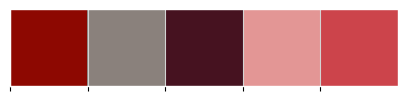

In [1]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

# Modeling.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, brier_score_loss
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

# Utils.
from src.eda_utils import *
from src.modelling_utils import *

# Display options.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Visualization Settings
mpl.style.use('ggplot')
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['axes.grid']           = True
#mpl.rcParams['figure.dpi']          = 150

# Palette Seting
instyle_palette = ['#8d0801', '#8a817c', '#461220', '#e39695', '#cc444b']
sns.set_palette(sns.color_palette(instyle_palette))
sns.palplot(sns.color_palette(instyle_palette))

#### 4.1 Collect the data
- The data contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and the latest payment information. 
- Considering that **LGD** is the proportion of the total exposure that cannot be recovered by the lender when the borrower defaults, and **EAD** is the amount a lender is exposed to when the borrower defaults, to construct these models, I will obtain **data only from defaulted borrowers.**
- Moreover, a good practice is to separate data only from **borrowers who have had enough time to repay part of the remaining debt**, allowing the Lending Club to make some **recoveries**. Thus, I will obtain data from **defaulters** with a **loan status of "charged off."**
- **Charged off status of a loan**: Indicates that the lender or financial institution has declared the outstanding balance of the loan as unlikely to be collected. The lender considers the **debt** as **uncollectible**, a **loss**.

In [2]:
parquet_file_path = '/Users/pedrohenriquealmeidaoliveira/Documents/data_science/lending_club_credit_scoring/input/clean_loan_data.parquet'
df = pd.read_parquet(parquet_file_path)

In [3]:
# Select data only from defaulters with a loan status charged off.
ead_lgd_df = df.loc[(df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off') |
                    (df['loan_status'] == 'Charged Off')]

In [4]:
# General information.
ead_lgd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43233 entries, 3 to 466242
Data columns (total 42 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   loan_amnt                    int32         
 1   funded_amnt                  int32         
 2   term                         int8          
 3   int_rate                     float32       
 4   installment                  float32       
 5   grade                        category      
 6   sub_grade                    category      
 7   emp_length                   int16         
 8   home_ownership               category      
 9   annual_inc                   float32       
 10  verification_status          category      
 11  issue_d                      datetime64[ns]
 12  loan_status                  category      
 13  purpose                      category      
 14  addr_state                   category      
 15  dti                          float32       
 16  delinq_2

- It is possible to see that the variables are in the correct data types, with optimized memory usage.
- We have 43,233 observations and 42 variables.

In [5]:
# Inspect duplicates.
ead_lgd_df.duplicated().sum()

0

In [6]:
# Inspect missing values.
missing_df = ead_lgd_df.isna().sum().to_frame().rename(columns={0: 'count'}).sort_values(by=['count'], ascending=False)
missing_df['pct'] = round(missing_df['count'] / ead_lgd_df.shape[0] * 100, 3)
missing_df.head(10)

,count,pct
mths_since_last_delinq,23947,55.391
total_rev_hi_lim,10777,24.928
tot_cur_bal,10777,24.928
tot_coll_amt,10777,24.928
revol_util,50,0.116
collections_12_mths_ex_med,25,0.058
loan_amnt,0,0.000
total_rec_late_fee,0,0.000
initial_list_status,0,0.000
out_prncp,0,0.000


- There is still some missing values. Variables like 'collections_12_mths_ex_med', 'revol_util', 'tot_coll_amt' and others will be further removed from the data to prevent data leakage, once they will not be available at the moment of the application. 
- Moreover, we saw on EDA that total_rev_hi_lim is highly correlated with revol_bal. This can lead to multicolinearity issues in our model, thus, as in the PD Model, I will keep only revol_bal because it does not have null records, removing total_rev_hi_lim. 
- Thus, we just need to impute missings in 'mths_since_last_delinq' and 'tot_cur_bal'. I will decide how to impute them in the preprocessing step.

#### 4.2 Dependent variables
- I will visualize the LGD and EAD models dependent variables, the recovery rate and the credit conversion factor, to decide about how I will procceed with the modeling step.

In [7]:
# Descriptive statistics.
ead_lgd_df[['recovery_rate', 'credit_conversion_factor']].describe().T

,count,mean,std,min,25%,50%,75%,max
recovery_rate,43233.0,0.060740,0.089092,0.000000,0.000000,0.029453,0.114043,1.0
credit_conversion_factor,43233.0,0.735964,0.200735,0.000438,0.632088,0.789943,0.888544,1.0


Insights:
- The average recovery rate is 6%; however, almost 50% of the recoveries are 0.
- The average credit conversion factor is 73.6%. Half of the conversion factors are between 63.2% and 88.8%.

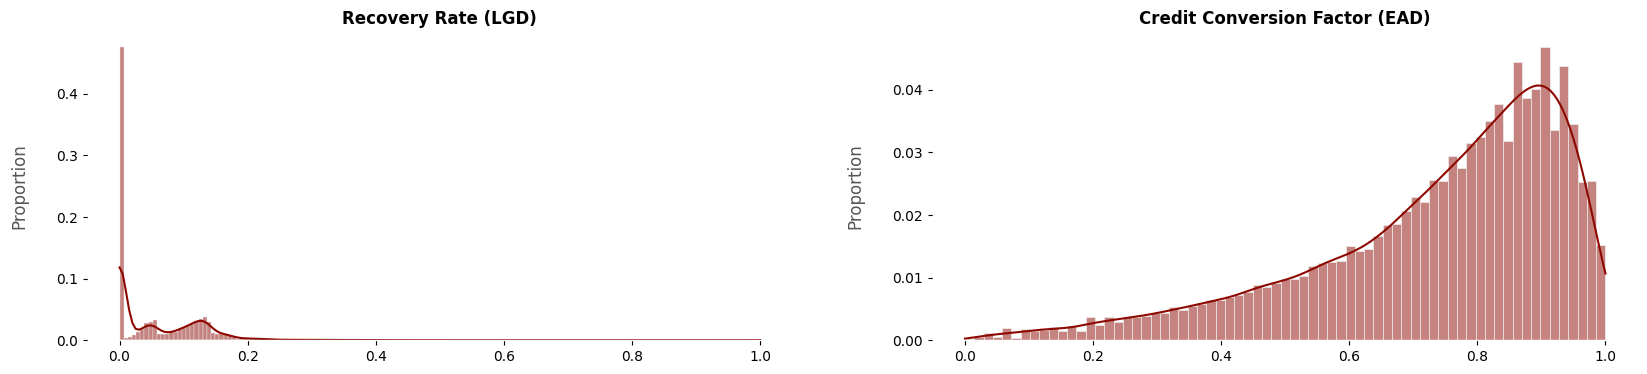

In [8]:
# Plot LGD and EAD dependent variables.
fig, ax = plt.subplots(1, 2, figsize=(20, 4))

sns.histplot(data=ead_lgd_df, x='recovery_rate', kde=True, ax=ax[0], stat='proportion')
ax[0].set_title('Recovery Rate (LGD)', fontweight='bold', fontsize=12)
ax[0].set_xlabel('')
ax[0].set_ylabel('Proportion', labelpad=20)
ax[0].grid(False)

sns.histplot(data=ead_lgd_df, x='credit_conversion_factor', kde=True, ax=ax[1], stat='proportion')
ax[1].set_title('Credit Conversion Factor (EAD)', fontweight='bold', fontsize=12)
ax[1].set_xlabel('')
ax[1].set_ylabel('Proportion', labelpad=20)
ax[1].grid(False)

Insights:
- It is noticeable that **more than 40% of the recovery rates are 0.** When building a regression model, such a bias could significantly impact performance. Thus, to **model recovery rate and LGD**, I will adopt a **two-stage approach:**
    - In the **first stage**, I will build a **Logistic Regression model** to **classify** whether the **recovery rate is 0 or greater than 0.** For the recoveries classified as zero, the process will conclude. For the **recoveries classified as greater than 0**, I will build a **regression model to predict their values**, constituting the **second stage** of LGD modeling.
- For the credit conversion factor, we have a more balanced distribution. Thus, a regression model is sufficient.
- I will create the **target for the first stage approach of the LGD Model**. It will be a binary variable indicating 0 if the recovery rate is 0 and 1 if the recovery rate is greater than zero.

In [9]:
# Create the target for the two-stage approach LGD modeling.
ead_lgd_df['recovery_rate_>0'] = np.where(ead_lgd_df['recovery_rate'] == 0, 0, 1)
ead_lgd_df['recovery_rate_>0'].value_counts(normalize=True)

recovery_rate_>0
1    0.563644
0    0.436356
Name: proportion, dtype: float64

#### 4.3 Split the data
- In the context of credit it's important to use an **out-of-time split** instead of an out-of-sample split because we want to understand how well the model, trained with past data, can predict the behavior of credit applicants in a future time. 
- The data was already sorted in data cleaning task, providing a chronological order for the loans. Thus, we only need to separate the first **80%** of the data for **training** and the remaining **20%** of the data for **testing**.
- I'll split the data first because the **test set** should contain data that the model hasn't encountered before, mimicking a **real-world production scenario.** So, I'll **set it aside now** and only use it for the final evaluation of the model later on.
- Furthermore, it's crucial to fit and transform only the training data to prevent issues like data leakage and overfitting, ensuring a reliable final performance estimate. Test data must only be transformed. Thus, the preprocessing will follow this guideline.

In [58]:
# Out-of-time split. 80% training, 20% testing.
train, test = np.split(ead_lgd_df, [int(.80 * len(ead_lgd_df))])
train['set'] = 'train'
test['set'] = 'test'

# Assessing train and test sets dimensions.
print(f'Train set has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test set has {test.shape[0]} rows and {test.shape[1]} columns.')

Train set has 34586 rows and 44 columns.
Test set has 8647 rows and 44 columns.


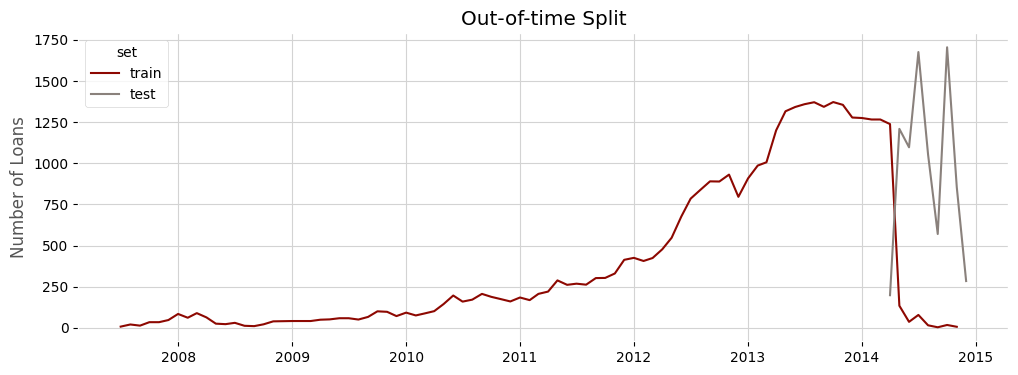

In [59]:
# Plot the out-of-time split.
train_test = pd.concat([train, test])
train_test = train_test.groupby(['issue_d', 'set'])['default'].count().reset_index().rename(columns={'default': 'loans'})

fig, ax = plt.subplots(figsize=(12, 4))
plt.title('Out-of-time Split')
sns.lineplot(train_test, x='issue_d', y='loans', hue='set', ax=ax)
plt.xlabel('')
plt.ylabel('Number of Loans')
plt.show()

# Drop columns used only for plotting.
to_drop = ['issue_d', 'set']
train = train.drop(columns=to_drop)
test = test.drop(columns=to_drop)

- The out-of-time split was successfully made.

#### 4.4 Data Preprocessing
- In order to **preprocess the data** for the **LGD** and **EAD models**, it is not necessary to extract only dummy variables. Since these models will be used by users familiar with statistics, we will follow these steps:
    - For the **categorical variables**, I will apply **one-hot encoding** to the **nominal** ones and **ordinal encoding** to the **ordinal ones**. I will remove arbitrary reference categories to avoid multicollinearity issues (dummy variable trap). This approach is chosen because we will use linear and logistic regressions, and these linear models benefit from one-hot encoding due to the linearity assumption. This technique is particularly helpful for treating non-ordinal features, where encoding with numbers could introduce a false hierarchy. Moreover, ordinal encoding will efficiently represent the ordinal variables, preserving their order property, and reducing dimensionality.
        - Since one-hot encoding already represents the variable with values of 0 or 1, there is no need to scale the data after this transformation.
        - I will apply standard scaling to the ordinal-encoded variables because they will not be at the same scale after this transformation.
        - I will combine categories for certain variables due to observations in the EDA revealing extremely low proportions in some categories. Creating dummies for these categories individually may result in overfitting. Additionally, combining categories allows me to reduce dimensionality.
    - For the **numerical variables**, we will apply **standard scaling**. Linear models use optimization algorithms such as gradient descent, and it is important for the convergence of these algorithms that the features are at the same scale. For example, in gradient descent using MSE, if the variables are not scaled, the MSE cost function resembles a large bowl, making convergence difficult.
    - For **handling missing values**, I will do the following:
        - **mths_since_last_delinq:** Since we interpret these missing values as instances where individuals were never delinquent, and considering the high proportion of records with nulls (more than 55%), I will impute them with -999. This will allow the model to capture the idea that these borrowers form a separate group, characterized by this value, indicating they were never delinquent. Moreover, this is a common practice seen in companies data bases.
        - **tot_cur_bal:** I will impute these values with the median, as the variable's distribution is right-skewed and contains many outliers, affecting the mean. This approach is expected to not introduce bias and work well, given the lower proportion of missing values.
- Moreover, the **same preprocessing steps** will be applied to the data to construct both **LGD and EAD models, except** that we will retain the corresponding **target** variable for each model. LGD 1st stage and EAD models will use the same input data, while LGD 2nd stage model will use input data with only greater than zero recovery rates, once these are those which we want to predict the corresponding value.
- Finally, **irrelevant variables** (identified in EDA) and variables that will not be available at the moment of prediction will be **removed**, preventing **data leakage** and maintaining the integrity of our models.

In [60]:
# Combine categories to avoid overfitting.
state_to_region = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast',
    'OH': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'WI': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'DE': 'South', 'MD': 'South', 'VA': 'South', 'WV': 'South', 'KY': 'South', 'NC': 'South', 'SC': 'South', 'TN': 'South', 'GA': 'South', 'FL': 'South', 'AL': 'South', 'MS': 'South', 'AR': 'South', 'LA': 'South', 'TX': 'South', 'OK': 'South',
    'MT': 'West', 'ID': 'West', 'WY': 'West', 'CO': 'West', 'NM': 'West', 'AZ': 'West', 'UT': 'West', 'NV': 'West', 'WA': 'West', 'OR': 'West', 'CA': 'West', 'AK': 'West', 'HI': 'West', 'DC': 'Northeast',
}

# Create a new 'Region' column by mapping the state abbreviations to regions
train['region'] = train['addr_state'].replace(state_to_region)
test['region'] = test['addr_state'].replace(state_to_region)

train['home_ownership'] = train['home_ownership'].replace(['RENT', 'NONE', 'OTHER'], 'RENT_NONE_OTHER')
test['home_ownership'] = test['home_ownership'].replace(['RENT', 'NONE', 'OTHER'], 'RENT_NONE_OTHER')
train['purpose'] = train['purpose'].replace(['educational', 'renewable_energy'], 'other')
test['purpose'] = test['purpose'].replace(['educational', 'renewable_energy'], 'other')
train['purpose'] = train['purpose'].replace(['vacation', 'moving', 'wedding'], 'vacation_moving_wedding')
test['purpose'] = test['purpose'].replace(['vacation', 'moving', 'wedding'], 'vacation_moving_wedding')
train['purpose'] = train['purpose'].replace(['house', 'car', 'medical'], 'house_car_medical')
test['purpose'] = test['purpose'].replace(['house', 'car', 'medical'], 'house_car_medical')

# Impute mths_since_last_delinq missing values with -999, indicating never deliquent borrowers.
train['mths_since_last_delinq'] = train['mths_since_last_delinq'].fillna(-999)
test['mths_since_last_delinq'] = test['mths_since_last_delinq'].fillna(-999)

In [61]:
# Obtain predictor and target train and test sets for LGD and EAD models, removing irrelevant variables.
data_leakage_variables = ['funded_amnt', 'installment', 'revol_util', 
                         'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 
                         'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                         'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt']
irrelevant_variables = ['delinq_2yrs', 'acc_now_delinq', 'pub_rec', 
                        'total_rev_hi_lim', 'loan_status', 'default', 'addr_state']
to_drop = data_leakage_variables + irrelevant_variables

target_lgd_logistic = 'recovery_rate_>0'
target_lgd_linear = 'recovery_rate'
target_ead = 'credit_conversion_factor'
targets = [target_lgd_logistic, target_lgd_linear, target_ead]

# Same train and test sets will be applied to 1st stage of LGD and EAD.
X_train = train.drop(columns=to_drop + targets)
X_test = test.drop(columns=to_drop + targets)
y_train_lgd_logistic = train[target_lgd_logistic]
y_test_lgd_logistic = test[target_lgd_logistic]
y_train_ead = train[target_ead]
y_test_ead = test[target_ead]

# 2nd stage of LGD will be trained only in recovery rates greater than zero.
X_train_lgd_linear = train.loc[train['recovery_rate_>0'] == 1].drop(columns=to_drop + targets)
X_test_lgd_linear = test.loc[test['recovery_rate_>0'] == 1].drop(columns=to_drop + targets)
y_train_lgd_linear = train.loc[train['recovery_rate_>0'] == 1, target_lgd_linear]
y_test_lgd_linear = test.loc[test['recovery_rate_>0'] == 1, target_lgd_linear]

In [62]:
# Obtain the categorical and numerical variables.
categorical_variables = X_train.select_dtypes('category').columns.tolist()
numerical_variables = X_train.select_dtypes('number').columns.tolist()

# Treat 'term' as a categorical variable because it presents just 2 unique values, 36 and 60.
categorical_variables.append('term')
numerical_variables.remove('term')

print(f'There are {len(categorical_variables)} categorical variables. They are: {categorical_variables}.')
print(f'There are {len(numerical_variables)} categorical variables. They are: {numerical_variables}.')


There are 8 categorical variables. They are: ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'region', 'term'].
There are 12 categorical variables. They are: ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'total_acc', 'tot_cur_bal', 'mths_since_earliest_cr_line'].


In [63]:
# Quickly visualize cardinality.
for variable in categorical_variables:
    print(f'{variable} | cardinality = {X_train[variable].nunique()}.')
    print(X_train[variable].unique().tolist())
    print()

grade | cardinality = 7.
['F', 'D', 'E', 'B', 'C', 'G', 'A']

sub_grade | cardinality = 35.
['F2', 'D3', 'D2', 'F3', 'E3', 'B1', 'C5', 'D5', 'F1', 'E4', 'D1', 'C4', 'E1', 'E2', 'C2', 'G2', 'G3', 'F5', 'C3', 'B5', 'B4', 'D4', 'F4', 'A2', 'G4', 'G5', 'C1', 'E5', 'B2', 'B3', 'G1', 'A3', 'A4', 'A5', 'A1']

home_ownership | cardinality = 3.
['MORTGAGE', 'RENT_NONE_OTHER', 'OWN']

verification_status | cardinality = 3.
['Verified', 'Not Verified', 'Source Verified']

purpose | cardinality = 8.
['debt_consolidation', 'other', 'house_car_medical', 'credit_card', 'vacation_moving_wedding', 'small_business', 'home_improvement', 'major_purchase']

initial_list_status | cardinality = 2.
['f', 'w']

region | cardinality = 4.
['West', 'Northeast', 'South', 'Midwest']

term | cardinality = 2.
[36, 60]



In [64]:
# Determining the list of variables to which each preprocessing will be applied.
nominal_features = ['term', 'region', 'initial_list_status',
                    'purpose', 'verification_status', 'home_ownership']
ordinal_features = ['grade', 'sub_grade']

# Construct the preprocessor.
nominal_pipe = Pipeline(
    steps=[
        ('one_hot_encoding', OneHotEncoder(drop='first', 
                                           handle_unknown='ignore', 
                                           sparse=False,
                                           feature_name_combiner='concat'))
    ]
)

ordinal_pipe = Pipeline(
    steps=[
        ('ordinal_encoding', OrdinalEncoder()),
        ('standard_scaling', StandardScaler())
    ]
)

numerical_pipe = Pipeline(
    steps=[
        ('median_imputing', SimpleImputer(strategy='median')),
        ('standard_scaling', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('nominal_pipe', nominal_pipe, nominal_features),
        ('ordinal_pipe', ordinal_pipe, ordinal_features),
        ('numerical_pipe', numerical_pipe, numerical_variables)
    ], remainder='passthrough'
)

In [68]:
# Preprocess all data for 1st and 2nd stages of LGD model and EAD model.
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

X_train_lgd_linear_prepared = preprocessor.fit_transform(X_train_lgd_linear)
X_test_lgd_linear_prepared = preprocessor.transform(X_test_lgd_linear)

# Obtain features list.
features_list = ['_'.join(x.split('_')[3:]) for x in preprocessor.get_feature_names_out().tolist()]

# Create DataFrames for better understanding and manipulation of prepared data.
X_train_prepared = pd.DataFrame(X_train_prepared, columns=features_list)
X_test_prepared = pd.DataFrame(X_test_prepared, columns=features_list)

X_train_lgd_linear_prepared = pd.DataFrame(X_train_lgd_linear_prepared, columns=features_list)
X_test_lgd_linear_prepared = pd.DataFrame(X_test_lgd_linear_prepared, columns=features_list)

X_train_prepared.head()

,term_60,region_Northeast,region_South,region_West,initial_list_status_w,purpose_debt_consolidation,purpose_home_improvement,purpose_house_car_medical,purpose_major_purchase,purpose_other,purpose_small_business,purpose_vacation_moving_wedding,verification_status_Source Verified,verification_status_Verified,home_ownership_OWN,home_ownership_RENT_NONE_OTHER,grade,sub_grade,loan_amnt,int_rate,emp_length,annual_inc,dti,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,total_acc,tot_cur_bal,mths_since_earliest_cr_line
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.920050,1.797994,-0.874820,0.050532,1.208511,3.104251,0.629904,2.190962,1.081908,1.094844,6.791207,0.641913,-0.351273,1.415487
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.466867,0.470702,1.284329,0.264694,-1.205672,0.137854,-0.938642,-0.812828,1.161989,-0.165237,0.234158,-0.596505,-0.577478,-0.320264
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.466867,0.323225,-1.042753,-0.213051,-1.205672,-0.482731,-1.790400,-0.812828,1.156129,-1.215305,-0.568085,-1.304173,-0.351273,-0.467987
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.920050,1.945471,-1.285657,0.125842,-1.205672,-0.855082,1.564217,-0.061881,1.081908,-1.005291,-0.607900,-1.569548,-0.351273,-0.788054
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.193459,1.208086,-0.874820,-0.245999,-1.473915,-0.482731,0.190921,23.968441,1.173708,1.514871,0.566930,0.641913,-0.351273,-0.320264


#### 4.5 Estimate the LGD and EAD Models
- As in the PD Model, I will use Logistic and Linear regressions with hypothesis testing to obtain p-values that indicate whether a predictor variable is statistically significant or not.